In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib.lines as mlines


def parse_bin_pairs(bin_list):
    """
    Parse bin pair strings like ['00', '10', '11', '20', '21', '22', ...]
    Returns list of (i, j) tuples
    """
    pairs = []
    for bin_str in bin_list:
        if len(bin_str) == 2:
            i, j = int(bin_str[0]), int(bin_str[1])
            pairs.append((i, j))
    return pairs

def create_cell_corner_plot(bin_pairs, ell_values, cells_pred, cells_fixed_field, cells_var, field2_name, bin_labels=None, 
                           title="$C_\\ell$ Cross-Correlation Corner Plot", ylabel = "$C_\\ell$"):
    """
    Create a corner plot showing C_ell vs ell for each bin pair
    
    Parameters:
    bin_pairs: list of strings like ['00', '10', '11', '20', '21', '22'] or list of tuples
    ell_values: array of ell values (x-axis for all plots)
    cell_data: 2D array where each row corresponds to C_ell values for each bin pair
    bin_labels: optional list of labels for the bins
    """
    
    # Parse bin pairs
    if isinstance(bin_pairs[0], str):
        pairs = parse_bin_pairs(bin_pairs)
    else:
        pairs = bin_pairs
    
    # Determine matrix size
    max_bin = max(max(pair) for pair in pairs)
    n_bins = max_bin + 1
    
    # Create bin labels if not provided
    if bin_labels is None:
        bin_labels = [f'Bin {i}' for i in range(n_bins)]
    
    # Create the corner plot
    fig = plt.figure(figsize=(12, 12))
    fig.suptitle(title, fontsize=16, y=0.95)
    
    # Create a mapping from bin pairs to data indices
    pair_to_idx = {pair: idx for idx, pair in enumerate(pairs)}
    
    # Create subplots
    gs = GridSpec(n_bins, n_bins, figure=fig, hspace=0.3, wspace=0.3)
    
    for i in range(n_bins):
        for j in range(n_bins):
            # Only show lower triangle and diagonal
            if j <= i:
                ax = fig.add_subplot(gs[i, j])
                
                # Get the corresponding data
                if (i, j) in pair_to_idx:
                    data_idx = pair_to_idx[(i, j)]
                    cell_vals_pred = cells_pred[data_idx]
                    cell_vals_fixed_field = cells_fixed_field[data_idx]
                    cell_vals_var = cells_var[data_idx]
                elif (j, i) in pair_to_idx:
                    data_idx = pair_to_idx[(j, i)]
                    cell_vals_pred = cells_pred[data_idx]
                    cell_vals_fixed_field = cells_fixed_field[data_idx]
                    cell_vals_var = cells_var[data_idx]
                # else:
                #     # No data for this pair, create empty plot
                #     cell_vals = np.zeros_like(ell_values)
                
                # Plot C_ell vs ell
                if i == j:
                    ax.plot(ell_values, cell_vals_pred,  linewidth=2, 
                            color = 'black')
                    ax.plot(ell_values, cell_vals_fixed_field, linewidth=2, 
                            color = 'red', ls = '--')
                    ax.plot(ell_values, cell_vals_var, linewidth=2, 
                            color = 'blue', ls = '--')
                else:
                    ax.plot(ell_values, cell_vals_pred, linewidth=2, 
                            color = 'black',)
                    ax.plot(ell_values, cell_vals_fixed_field, linewidth=2, 
                            color = 'red', ls = '--')
                    ax.plot(ell_values, cell_vals_var,  linewidth=2, 
                            color = 'blue', ls = '--')
                
                # Formatting
                ax.set_xscale('log')
                ax.set_yscale('log')
                ax.grid(True, alpha=0.3)
                
                # Labels only on edges
                if i == n_bins - 1:  # Bottom row
                    ax.set_xlabel('$\\ell$', fontsize=12)
                else:
                    ax.set_xticklabels([])
                    
                if j == 0:  # Leftmost column
                    ax.set_ylabel(ylabel, fontsize=12)
                
                # Add text annotation for bin pair
                if i == j and i == 0:
                    ax.text(0.5, 1.05, fr'DM × DM', 
                       transform=ax.transAxes, fontsize=10, 
                        horizontalalignment='center',
                       bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
                elif ( i==0 and j>0):
                    ax.text(0.5, 1.05, fr'DM × {field2_name} {bin_labels[j]}', 
                       transform=ax.transAxes, fontsize=10, 
                        horizontalalignment='center',
                       bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
                elif ( i>0 and j==0):
                    ax.text(0.5, 1.05, fr'{field2_name} {bin_labels[i]} × DM', 
                       transform=ax.transAxes, fontsize=10, 
                        horizontalalignment='center',
                       bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
                else:
                    ax.text(0.5, 1.05, fr'{field2_name} {bin_labels[i]} × {field2_name} {bin_labels[j]}', 
                       transform=ax.transAxes, fontsize=10, 
                        horizontalalignment='center',
                       bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
                
    

    legend_entry_pred = mlines.Line2D([], [], color='black', linestyle='-', label='Prediction')
    legend_entry_fixed_field = mlines.Line2D([], [], color='red', linestyle='--', label='Fixed Field')
    legend_entry_field_variace = mlines.Line2D([], [], color='blue', linestyle='--', label='field Variance')
    
    legend_entries_list = [legend_entry_pred, legend_entry_fixed_field, legend_entry_field_variace]
    fig.legend(handles=legend_entries_list, loc='upper right', fontsize=12, bbox_to_anchor=(0.9, 0.9))
    
    
    plt.tight_layout()
    return fig


In [25]:
field_variance = np.load('/home/s59efara_hpc/covariance/data_sets/variance_pred_results_lensing1.npy')
fixed_field = np.load('/home/s59efara_hpc/covariance/data_sets/fixed_field_results_lensing1.npy')

In [26]:






import pymaster as nmt
nside = 512
nell = 15
lmin = 20
edges = np.geomspace(lmin,3*nside,nell).astype(int)
b = nmt.NmtBin.from_edges(edges[:-1], edges[1:])

In [27]:
cls_prediction_list = field_variance[:,0,:]
cls_field_variance_list = field_variance[:,1,:]

sigma_field_variance_list = field_variance[:,2,:]
sigma_pred = field_variance[:,3,:]

cls_fixed_field_list = fixed_field[:,0,:]
sigma_fixed_field_list = fixed_field[:,1,:]

ls = b.get_effective_ells()

In [28]:
import plothist

/tmp/ipykernel_2857244/2474918935.py:138: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


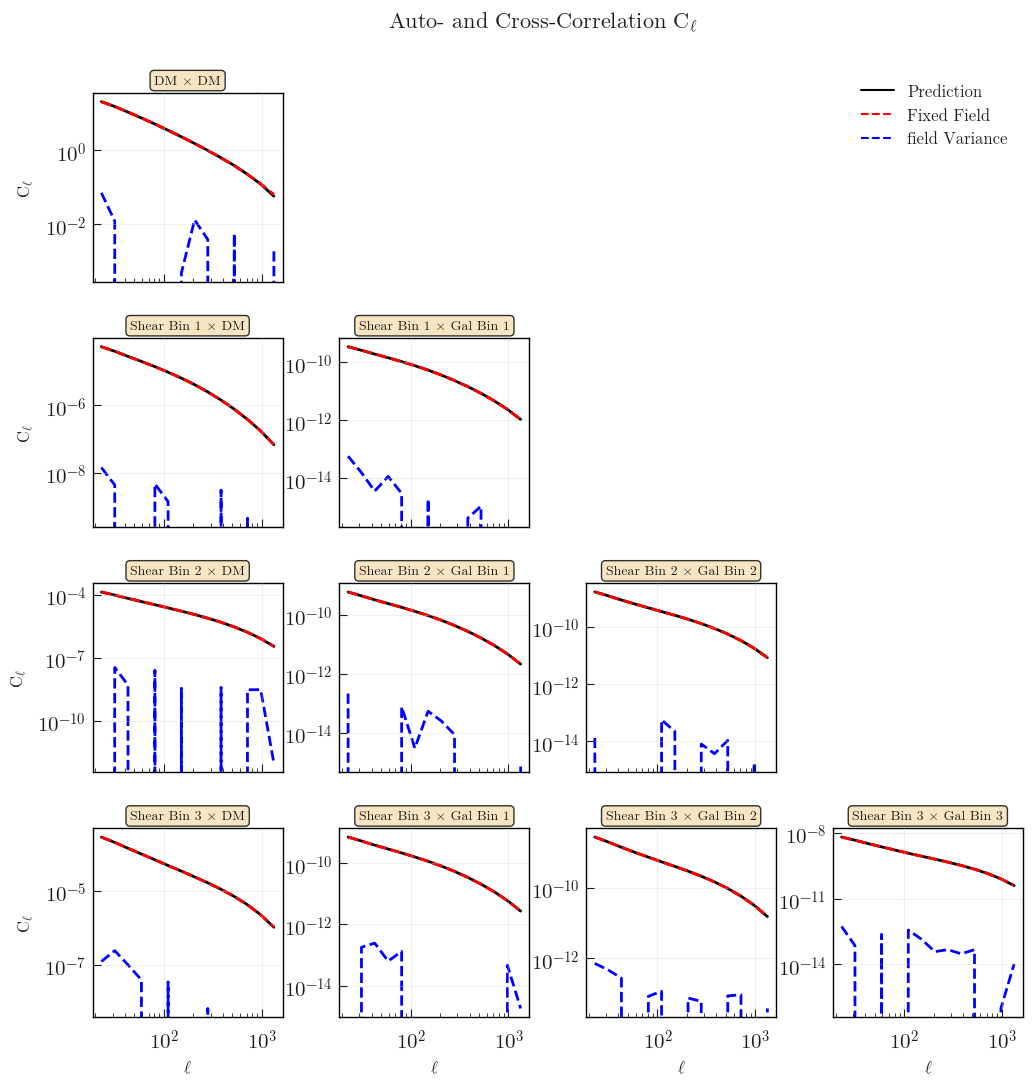

In [29]:
# Example data - replace with your actual data
bin_pairs = ['00', '10', '11', '20', '21', '22', '30', '31', '32', '33']



# Create corner plot
fig = create_cell_corner_plot(bin_pairs, ls, cls_prediction_list, cls_fixed_field_list, cls_field_variance_list, field2_name='Shear',
                                title="Auto- and Cross-Correlation $C_\\ell$")

# # Create alternative stacked plot
# fig2 = create_stacked_cell_plot(bin_pairs, ell_values, cell_data,
#                                 title="Cross-Correlation $C_\\ell$ Measurements")

plt.show()

In [30]:
fig.savefig('cls_covariance_compare_len.png', dpi=300)

/tmp/ipykernel_2857244/2474918935.py:138: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


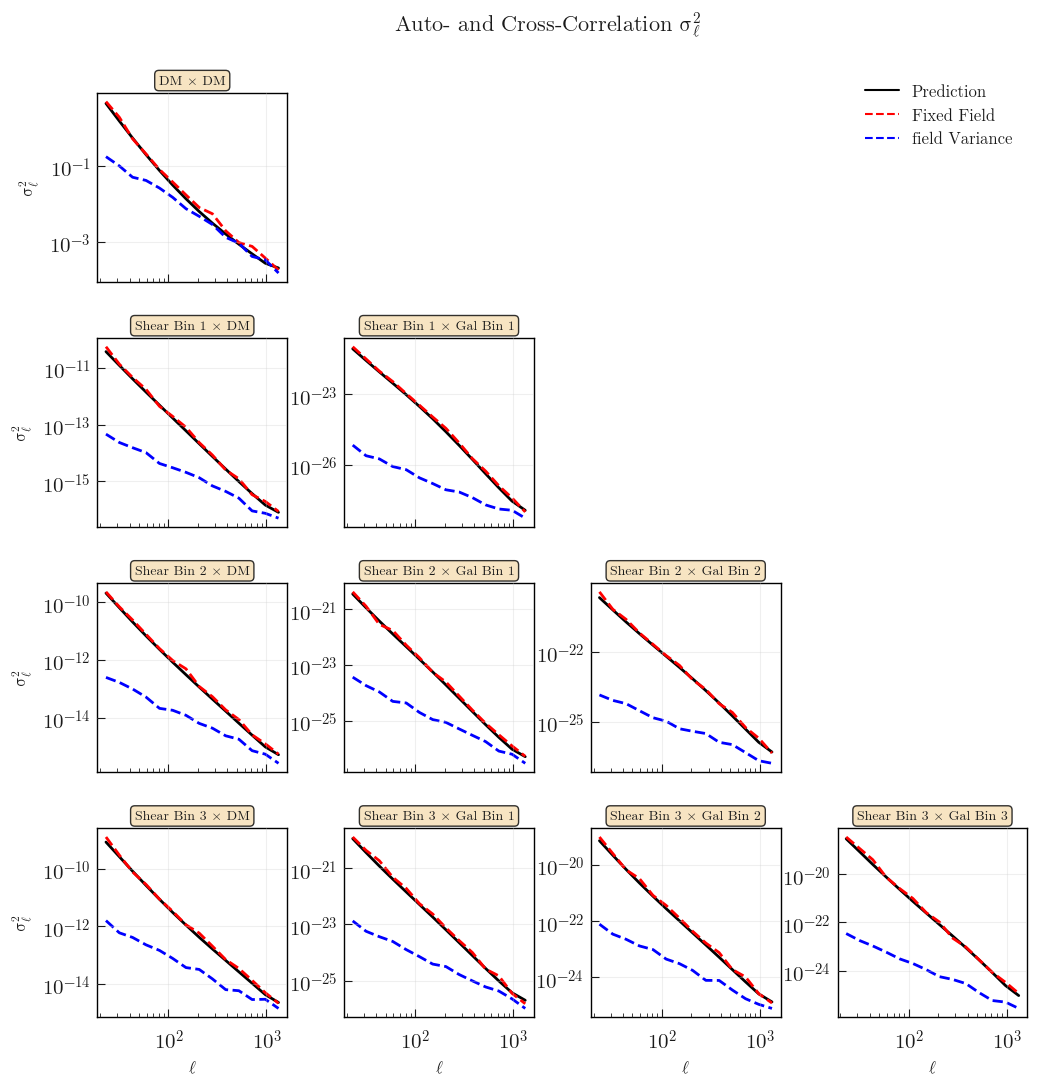

In [31]:
fig = create_cell_corner_plot(bin_pairs, ls, sigma_pred, sigma_fixed_field_list, sigma_field_variance_list,field2_name='Shear',
                                title="Auto- and Cross-Correlation $\sigma_{\ell}^2$", ylabel = "$\sigma_{\ell}^2$")


In [32]:
fig.savefig('sigma_covariance_compare_lens.png', dpi=300)